# Purpose
This notebook will provide an illustration of a discrete choice model that tries to estimate causal effects, without making use of the framework outlined in Brathwaite and Walker (2018).
The study of note is
> Chiara, Giacomo Dalla, Lynette Cheah, Carlos Lima Azevedo, and Moshe E. Ben-Akiva. "A Policy-Sensitive Model of Parking Choice for Commercial Vehicles in Urban Areas." Transportation Science (2020).

This notebook draw the causal diagram that we believes corresponds to the parking choice model in that paper. Additionally, this notebook will point out some tests that could have been done and should be presented to justify this paper's causal model, even before estimating parameters of the proposed choice models.

In [1]:
from causalgraphicalmodels import CausalGraphicalModel

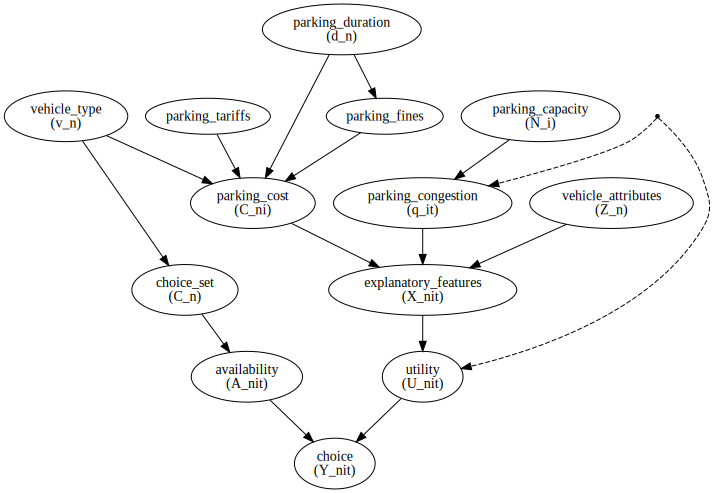

In [10]:
# Note that string representations stored
# as objects so I can later easily change the
# string representations in one place and update
# the representation everywhere
parking_duration = 'parking_duration\n(d_n)'
vehicle_type = 'vehicle_type\n(v_n)'
choice_set = 'choice_set\n(C_n)'
parking_tariffs = 'parking_tariffs'
parking_fines = 'parking_fines'
parking_cost = 'parking_cost\n(C_ni)'
vehicle_attributes = 'vehicle_attributes\n(Z_n)'
parking_congestion = 'parking_congestion\n(q_it)'
parking_capacity = 'parking_capacity\n(N_i)'
explanatory_features = 'explanatory_features\n(X_nit)'
unobserved_confounders = 'unobserved_confounders'
utility = 'utility\n(U_nit)'
availability = 'availability\n(A_nit)'
choice = 'choice\n(Y_nit)'

nodes =\
    [parking_duration,
     vehicle_type,
     choice_set,
     parking_tariffs,
     parking_fines,
     parking_cost,
     vehicle_attributes,
     parking_congestion,
     parking_capacity,
     explanatory_features,
     utility,
     availability,
     choice,
    ]

edges =\
    [(parking_duration, parking_cost),
     (vehicle_type, parking_cost),
     (parking_tariffs, parking_cost),
     (parking_fines, parking_cost),
     (parking_duration, parking_fines),
     (vehicle_type, choice_set),
     (choice_set, availability),
     (availability, choice),
     (parking_cost, explanatory_features),
     (explanatory_features, utility),
     (utility, choice),
     (vehicle_attributes, explanatory_features),
     (parking_congestion, explanatory_features),
     (parking_capacity, parking_congestion),
    ]

latent_edges = [(parking_congestion, utility)]

parking_causal_model =\
    CausalGraphicalModel(
        nodes=nodes,
        edges=edges,
        latent_edges=latent_edges
    )

parking_causal_model.draw()

As usual, one immediate question is whether this causal model's testable implications are supported by the author's dataset.

More specific questions arise when one considers the models and policy interventions analyzed in the paper.
In particular, the authors consider policy interventions that set or alter:
- parking capacity
- parking duration
- parking tariffs
- parking fines

One is led to immediately wonder how parking duration relates to parking tariffs, parking fines, and vehicle attributes such as the type of vehicle owner (e.g. large corporation vs independent truck owner) and the type of goods being transported (large heavy loads vs small loads).

Chiara et al., state that they tread parking duration as "exogenous and known by the driver before making a parking choice" (p. 7).
This assumption seems a-priori suspect.
The causal graph above suggests testing this assumption by attempting to falsify the implicit assumption of:
- conditional independence between vehicle attributes and parking duration
- marginal independence between parking duration and parking tariffs